## Exploratory Data Analysis

## What is Exploratory Data Analysis?
Doing statistics is like doing crosswords except that one cannot know for sure whether one has found the solution.

![Image of Yaktocat](http://www.jsquaredanalytics.com/wp-content/uploads/2013/06/Dashboard_1.png)

Further reading: https://svds.com/value-exploratory-data-analysis/

## Why do we need Exploratory Data Analysis?
   1. Summarize the main characteristics of datasets with Summary Statistics (Initial Data Analysis)
   2. Visually inspect the structure and nature of the data
   3. Find what the data can tell us

### Objectives

   1. Univariate Analysis (single variable)
   2. Bivariate associations (correlations)
   3. Multivariate patterns (analysis)
   



# Seaborn

Seaborn is great for the data exploration stage as we can make complex plots very easily and they also look great. This notebook contains various different plot types for you reference.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(color_codes=True) #overide maplot libs ugly colours.
mpl.rcParams['figure.figsize'] = [13, 8] #default figure size

# Data

We'll work with one of the toy datasets to get familiar with the plotting.

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Boxplot


<Axes: ylabel='tip'>

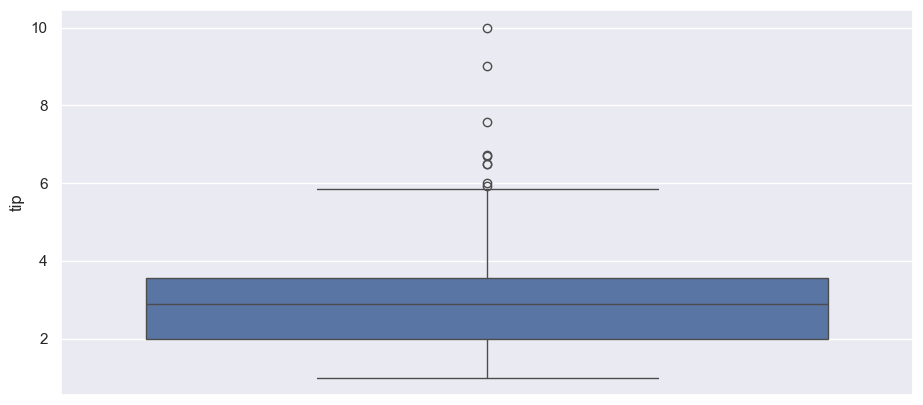

In [5]:
mpl.rcParams['figure.figsize'] = [11, 5]
sns.boxplot(df['tip'])

<Axes: xlabel='day', ylabel='tip'>

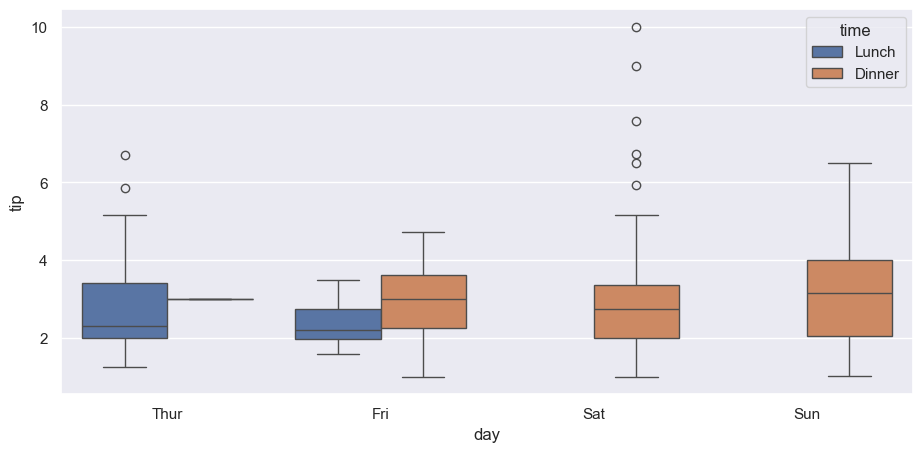

In [6]:
sns.boxplot(data = df,x="day",y="tip", hue="time")

* Median for thursday is the lowest
* On saturday there are lots of outliers
* Sunday has the highest variance in tips

# Distributions

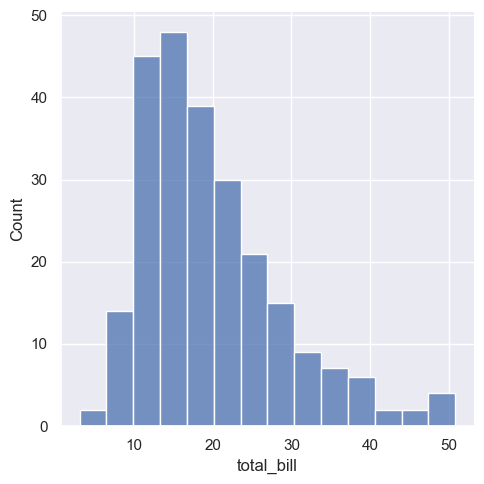

In [7]:
sns.displot(df.total_bill)

* Not normally disributed, slightly skewed
* Mode is around 18
* Mean is around 25

In [8]:
df.total_bill.mean()

19.78594262295082

In [9]:
df.total_bill.mode()

0    13.42
Name: total_bill, dtype: float64

In [10]:
df.total_bill.median()

17.795

# Violin

Violin plots are great since we get two plots in one, there essentially a combination of distribution and a boxplot.


<Axes: ylabel='total_bill'>

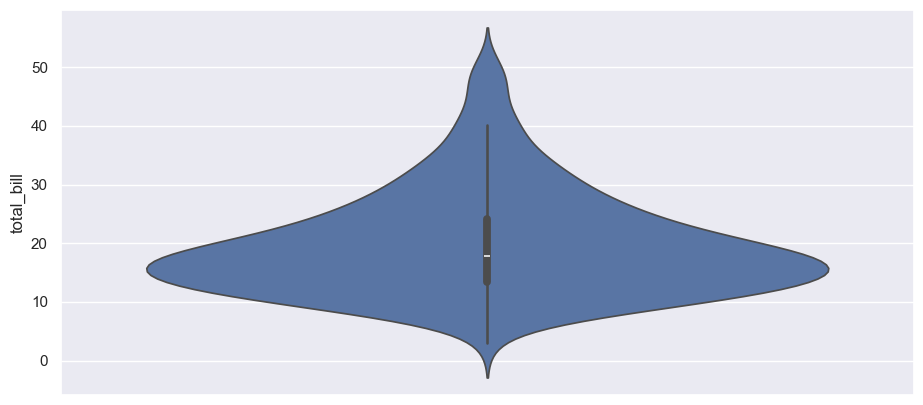

In [11]:
sns.violinplot(y =df.total_bill)

We can see that the data is well centered around the mean is the above plot.

<Axes: xlabel='day', ylabel='tip'>

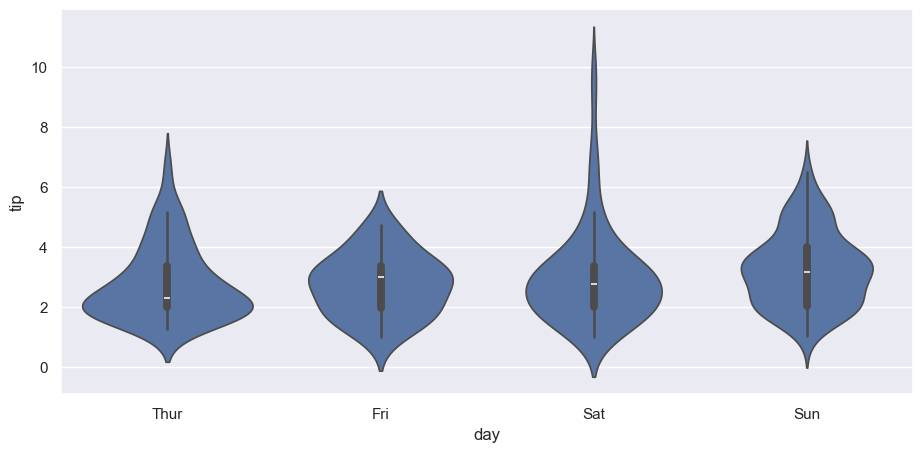

In [12]:
sns.violinplot(data=df,y='tip',x='day')

By comparing the violin plot for the 4 days we see that thursday and saturday have some outliers due to the longer tail in the plot. 

# PairPlot

Can be used to quicly plot all numerical data in a pairwise manner, we get histograms on the diagonal and scatter plots on the off diagonals.

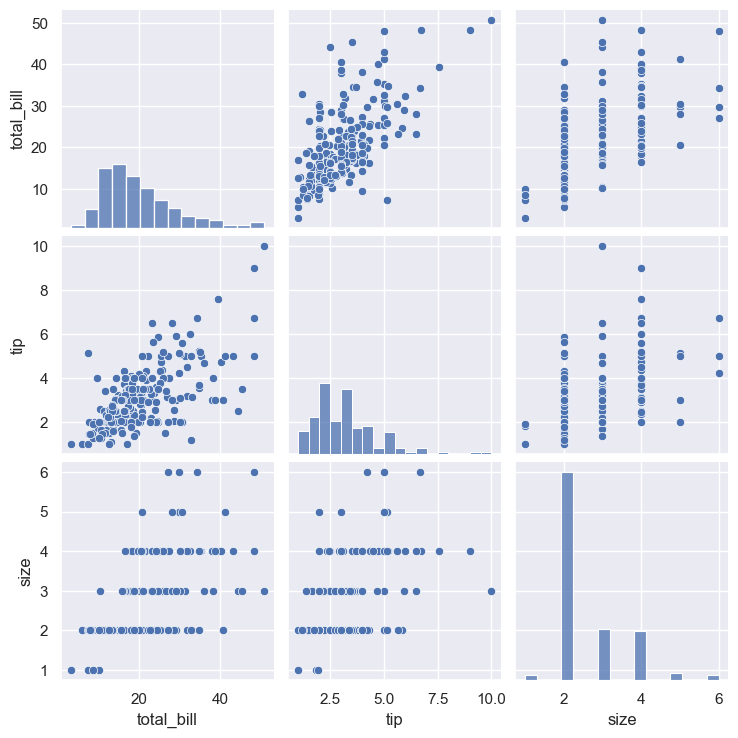

In [13]:
sns.pairplot(data=df)

No comment

# PairGrid

Pairgrid provides us a convenient way to specify which type of plots we want on the grid.

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


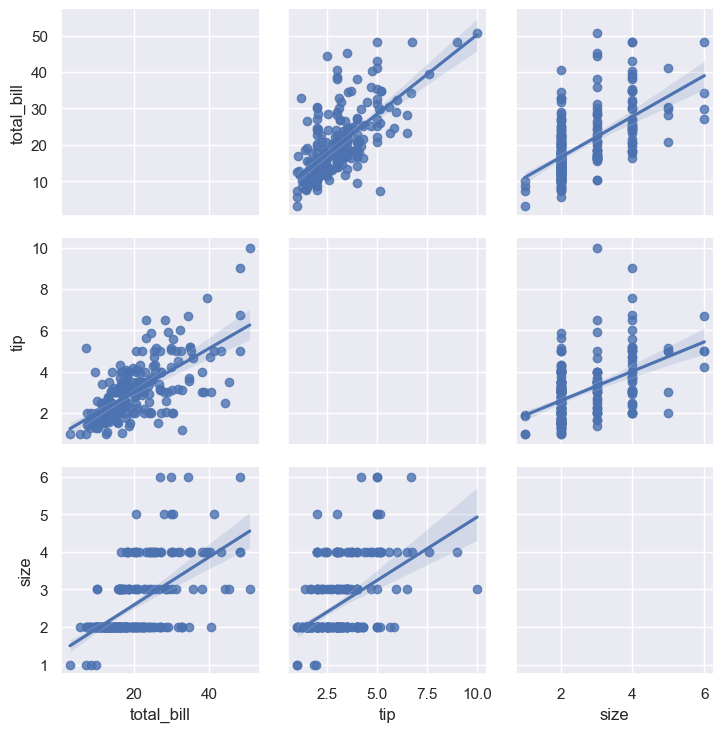

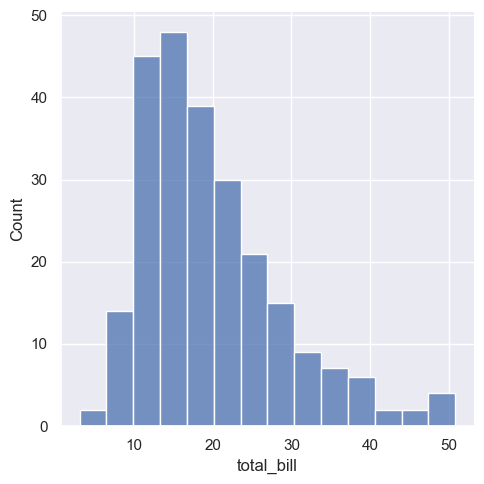

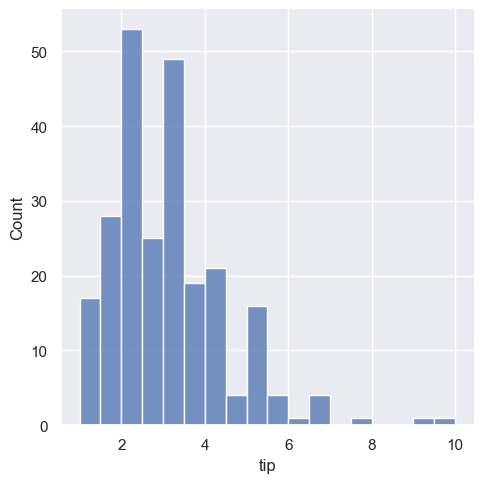

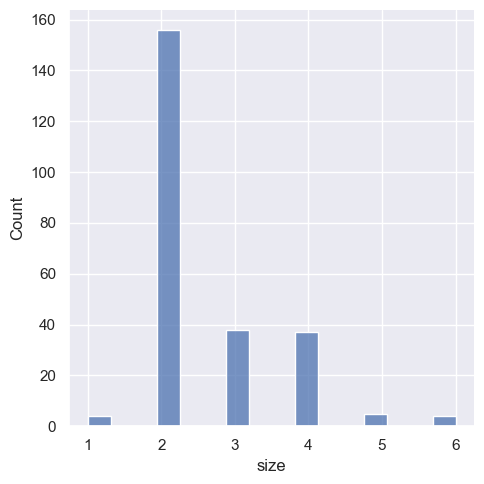

In [14]:
g = sns.PairGrid(df)
g.map_diag(sns.displot)
g.map_offdiag(sns.regplot)

No information can really be concluded from this pair grid.

# Bar

<Axes: xlabel='day', ylabel='total_bill'>

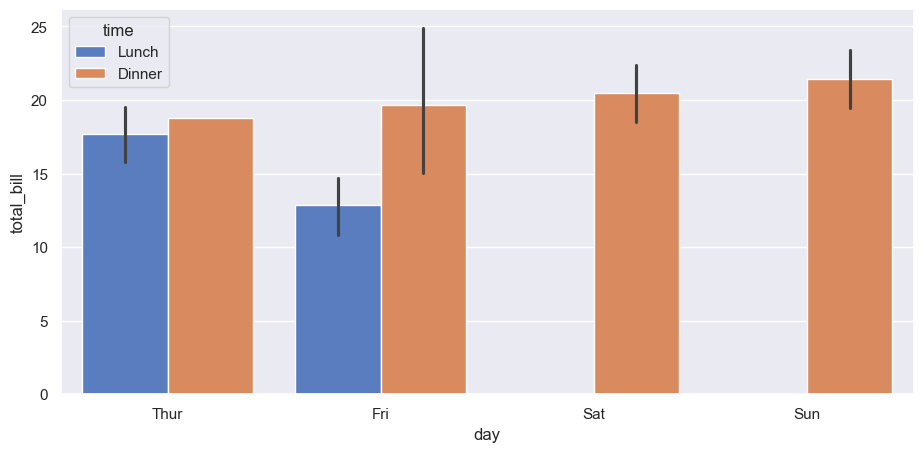

In [15]:
sns.barplot(data=df, x = 'day',y ="total_bill", palette= "muted", hue="time")

The black bars indicate the standard deviation, or the area that we are  95% certain that the mean is within that black line. Although we can see that on Saturday and Sunday people spend the most on average since the black error bars still overlap we can't statstically reject that there means are different.

# Heatmap

An easy way to look for correlated variables.

In [17]:
df.corr()

ValueError: could not convert string to float: 'No'

/var/folders/w8/hd7k7n4n3s5bl7rzx8cf6y2c0000gn/T/ipykernel_2390/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

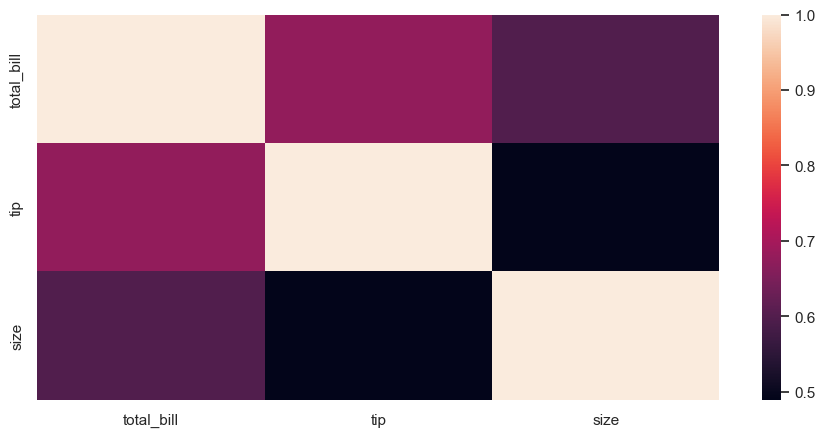

In [ ]:
sns.heatmap(df.corr())

# Regression

In [ ]:
import statsmodels.formula.api as smf

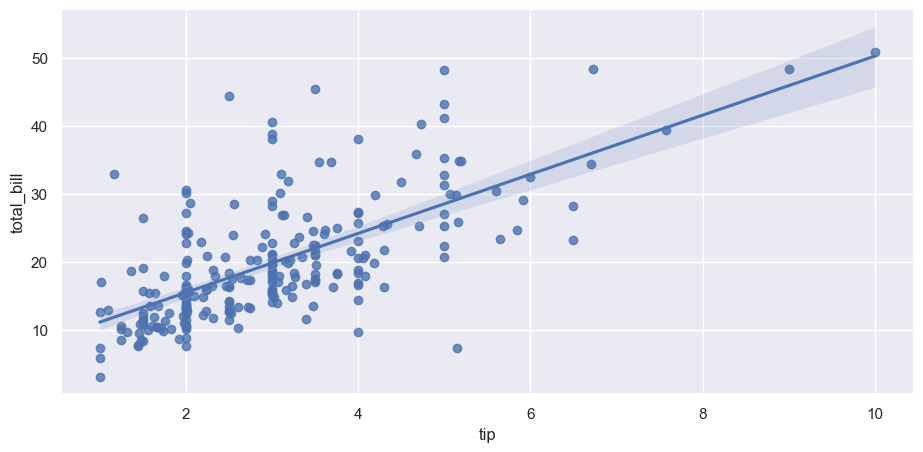

In [ ]:
p = sns.regplot(y = df.total_bill , x = df.tip)

In [ ]:
results = smf.ols('total_bill~tip ' , data = df).fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           6.69e-34
Time:                        06:38:38   Log-Likelihood:                -804.77
No. Observations:                 244   AIC:                             1614.
Df Residuals:                     242   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7503      1.006      6.707      0.000       4.768       8.733
tip            4.3477      0.305     14.260      0.000       3.747       4.948
==============================================================================
Omnibus:                       58.831   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.799
Skew:                           1.185   Prob(JB):                     5.87e-27
Kurtosis:                       5.502   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After looking at R-Square which is only around 45% so the simple linear regression is not a good fit.

# References

* [Seaborn API](https://seaborn.pydata.org/api.html)